In [ ]:
!pip install qiskit qiskit[visualization] qiskit_aer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.circuit.library import HamiltonianGate

from qiskit.providers.fake_provider import GenericBackendV2

In [ ]:
Jx = np.array([[0, 1], [1, 0]])
Jy = np.array([[0, -1.0j], [1.0j, 0]])
Jz = np.array([[1.0, 0], [0.0, -1.0]])
id = np.array([[1.0, 0], [0.0, 1.0]])
Jx1 = np.kron(id, Jx)
Jx2 = np.kron(Jx, id)
Jx1Jx2 = np.kron(Jx, Jx)
Jy1Jy2 = np.kron(Jy, Jy)
Jz1Jz2 = np.kron(Jz, Jz)

omega_x = 2.3
A = 0.05
Delta_t = 0.02

In [ ]:
ga_U1 = HamiltonianGate(Jx1, time=omega_x * Delta_t, label='$J_{x1}$').control(1)
ga_U2 = HamiltonianGate(Jx2, time=omega_x * Delta_t, label='$J_{x2}$').control(1)
ga_U3 = HamiltonianGate(Jx1Jx2, time=A * Delta_t, label='$J_{x1}J_{x2}$').control(1)
ga_U4 = HamiltonianGate(Jy1Jy2, time=A * Delta_t, label='$J_{y1}J_{y2}$').control(1)
ga_U5 = HamiltonianGate(Jz1Jz2, time=A * Delta_t, label='$J_{z1}J_{z2}$').control(1)


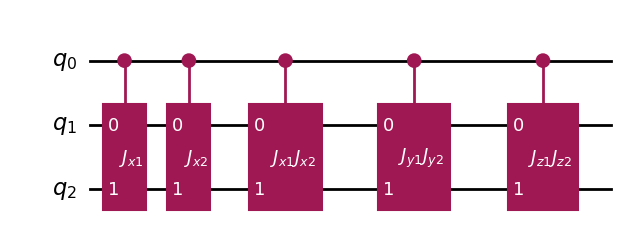

In [ ]:
qc = QuantumCircuit(3)
qc.append(ga_U1, [0, 1, 2])
qc.append(ga_U2, [0, 1, 2])
qc.append(ga_U3, [0, 1, 2])
qc.append(ga_U4, [0, 1, 2])
qc.append(ga_U5, [0, 1, 2])
qc.draw('mpl')

In [ ]:
ga_UDelta_t = qc.to_gate(label='$U(\Delta t)$')

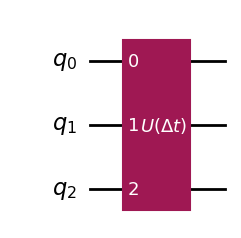

In [ ]:
qc = QuantumCircuit(3)
qc.append(ga_UDelta_t, [0, 1, 2])
qc.draw('mpl')

In [ ]:
nc = 100
qc_list = []
for ii in range(nc):
  qc_sim = QuantumCircuit(3, 3)
  qc_sim.h(0)
  qc_sim.barrier()
  qc_sim.cx(0,1)
  qc_sim.cx(0,2)
  for jj in range(ii):
    qc_sim.append(ga_UDelta_t, [0, 1, 2])
  qc_sim.barrier()
  qc_sim.x(0)
  qc_sim.ch(0, 1)
  qc_sim.ch(0, 2)
  qc_sim.x(0)
  qc_sim.h(0)
  qc_sim.barrier()
  qc_sim.measure([0, 1, 2], [0, 1, 2])
  qc_list.append(qc_sim)

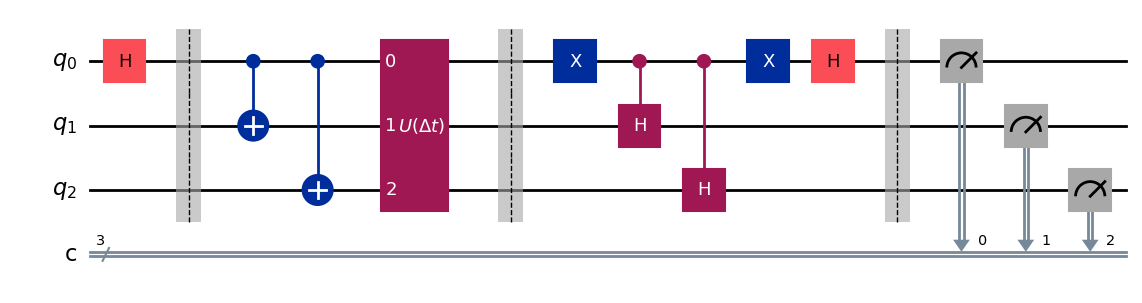

In [ ]:
qc_list[1].draw('mpl')

In [ ]:
#backend = GenericBackendV2(3)
backend = AerSimulator()
qc_tran = transpile(qc_list, backend=backend)

In [ ]:
shots = 64 * 1024
job = backend.run(qc_tran, shots=shots)
print(job.job_id())

a09ad4a9-fee3-48bb-8e08-647bdd6fafa6


In [ ]:
job.status()

<JobStatus.RUNNING: 'job is actively running'>

In [ ]:
counts = job.result().get_counts()

In [ ]:
dic ={'000': 20, '001': 30, '010': 50}
[dic.get('000', 0), dic.get('011', 0)]

[20, 0]

In [ ]:
t_list = []
alpha1_list = []
alpha2_list = []
alpha3_list = []
alpha4_list = []
cphi1_list = []
cphi2_list = []
cphi3_list = []
cphi4_list = []

t = 0.0
for count in counts:
  p000=count.get('000',0)/shots
  p001=count.get('001',0)/shots
  p010=count.get('010',0)/shots
  p011=count.get('011',0)/shots
  p100=count.get('100',0)/shots
  p101=count.get('101',0)/shots
  p110=count.get('110',0)/shots
  p111=count.get('111',0)/shots

  val1 = 2*(p000+p001-1/8)
  if val1 < 0 :
    alpha1=0.00001
    print(val1)
  else:
    alpha1=np.sqrt(val1)

  val2 = 2*(p010+p011-1/8)
  if val2 < 0 :
    alpha2=0.00001
    print(val2)
  else:
    alpha2=np.sqrt(val2)

  val3 = 2*(p100+p101-1/8)
  if val3 < 0 :
    alpha3=0.00001
    print(val3)
  else:
    alpha3=np.sqrt(val3)

  val4 = 2*(p110+p111-1/8)
  if val4 < 0 :
    alpha4=0.00001
    print(val4)
  else:
    alpha4=np.sqrt(val4)

  cphi1=2*(p000-p001)/alpha1

  cphi2=2*(p010-p011)/alpha2

  cphi3=2*(p100-p101)/alpha3

  cphi4=2*(p110-p111)/alpha4

  t_list.append(t)
  t += Delta_t

  alpha1_list.append(alpha1)
  alpha2_list.append(alpha2)
  alpha3_list.append(alpha3)
  alpha4_list.append(alpha4)

  cphi1_list.append(cphi1)
  cphi2_list.append(cphi2)
  cphi3_list.append(cphi3)
  cphi4_list.append(cphi4)

-0.0001220703125
-0.009674072265625
-0.000518798828125
-0.003143310546875
-0.0020751953125
-0.001007080078125
-0.003875732421875
-0.003997802734375
-0.005218505859375
-0.002685546875
-0.00054931640625
-0.00238037109375
-0.000885009765625
-0.000213623046875
-0.000396728515625
-0.00274658203125
-0.001739501953125
-0.0032958984375


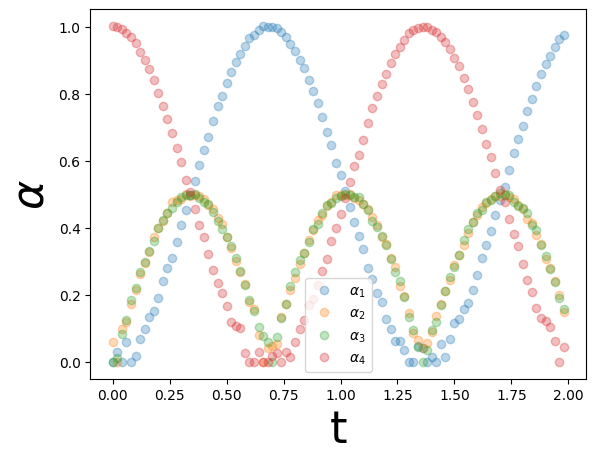

In [ ]:
plt.plot(t_list, alpha1_list, 'o', alpha=0.3, label=r'$\alpha_1$')
plt.plot(t_list, alpha2_list, 'o', alpha=0.3, label=r'$\alpha_2$')
plt.plot(t_list, alpha3_list, 'o', alpha=0.3, label=r'$\alpha_3$')
plt.plot(t_list, alpha4_list, 'o', alpha=0.3, label=r'$\alpha_4$')
plt.xlabel('t', fontsize=32)
plt.ylabel(r'$\alpha$', fontsize=32)
plt.legend()
plt.show()